In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [3]:
df = pd.read_csv("personality_dataset.csv")


In [4]:
num_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
cat_cols = ['Stage_fear', 'Drained_after_socializing']


In [5]:
for col in num_cols:
     df[col] = df[col].fillna(df[col].median())

for col in cat_cols:
     df[col] = df[col].fillna(df[col].mode()[0])

In [6]:
df['Stage_fear'] = df['Stage_fear'].str.strip().str.capitalize()
df['Drained_after_socializing'] = df['Drained_after_socializing'].str.strip().str.capitalize()



 Accuracy: 0.9172

Classification Report:
              precision    recall  f1-score   support

   Extrovert       0.94      0.90      0.92       298
   Introvert       0.90      0.94      0.92       282

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



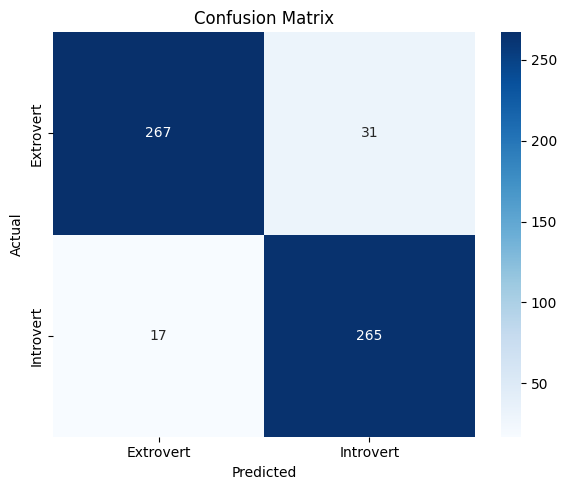

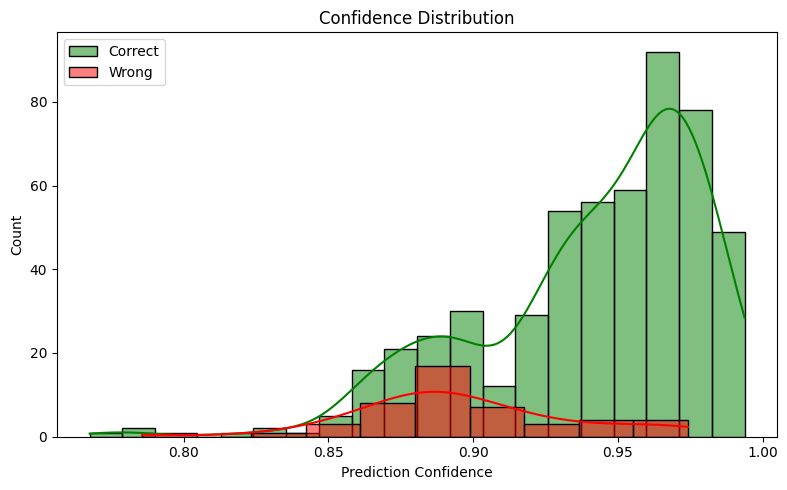

Model training and evaluation complete.


In [7]:
# Target encoding 
le_personality = LabelEncoder()
y = le_personality.fit_transform(df['Personality'])

# Encode categorical variables 
le_stage = LabelEncoder()
le_drained = LabelEncoder()

df['Stage_fear_encoded'] = le_stage.fit_transform(df['Stage_fear'])
df['Drained_after_socializing_encoded'] = le_drained.fit_transform(df['Drained_after_socializing'])


# Feature selection 
selected_features = num_cols + ['Stage_fear_encoded', 'Drained_after_socializing_encoded']
X = df[selected_features]

# Train/test split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Random Forest 
rf_model = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=42)
rf_model.fit(X_train, y_train)

# Save model and encoder 
joblib.dump(rf_model, "rf_personality_model.pkl")
joblib.dump(le_personality, "le_personality.pkl")

# Evaluation 
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)

print(f"\n Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le_personality.classes_))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=le_personality.classes_, yticklabels=le_personality.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Confidence Distribution
confidences = y_proba.max(axis=1)
correct = (y_pred == y_test)

plt.figure(figsize=(8, 5))
sns.histplot(confidences[correct], color='green', label='Correct', kde=True)
sns.histplot(confidences[~correct], color='red', label='Wrong', kde=True)
plt.xlabel("Prediction Confidence")
plt.title("Confidence Distribution")
plt.legend()
plt.tight_layout()
plt.show()

print("Model training and evaluation complete.")